## Problem Statement:
**Develop an image classfication model to recognize different types of food items from images.**

## 1. Data Collection:
For this project, I have collected data from [https://www.kaggle.com/datasets/iamsouravbanerjee/indian-food-images-dataset](kaggle).

### About Dataset
**Context**
Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, in particular Hinduism, cultural choices, and traditions. Centuries of Islamic rule, particularly by the Mughals, also introduced dishes like samosa and pilaf.

Historical events such as invasions, trade relations, and colonialism have played a role in introducing certain foods to this country. The Columbian discovery of the New World brought a number of new vegetables and fruit to India. A number of these such as the potato, tomatoes, chilies, peanuts, and Guava have become staples in many regions of India. Indian cuisine has shaped the history of international relations; the spice trade between India and Europe was the primary catalyst for Europe's Age of Discovery. Spices were bought from India and traded around Europe and Asia. Indian cuisine has influenced other cuisines across the world, especially those from Europe (especially Britain), the Middle East, Southern African, East Africa, Southeast Asia, North America, Mauritius, Fiji, Oceania, and the Caribbean.

**Content**
In this Dataset, we have 4000 Indian Food Images in 80 different categories or classes.

In [1]:
## Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import pathlib

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

**Import Data**

In [2]:
directory = "Indian Food Image Dataset\Indian Food Images"  
directory = pathlib.Path(directory)

In [3]:
print(directory)

Indian Food Image Dataset\Indian Food Images


## 2. Data Preprocessing:
* Resize Image
* normalize pixel value
* split data

In [4]:
img_height, img_width = 180, 180
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    validation_split=0.2,
    subset="training",
    seed=120,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="categorical"
)

Found 4000 files belonging to 80 classes.
Using 3200 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    validation_split=0.2,
    subset="validation",
    seed=120,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="categorical"
)


Found 4000 files belonging to 80 classes.
Using 800 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'ariselu', 'bandar_laddu', 'basundi', 'bhatura', 'bhindi_masala', 'biryani', 'boondi', 'butter_chicken', 'chak_hao_kheer', 'cham_cham', 'chana_masala', 'chapati', 'chhena_kheeri', 'chicken_razala', 'chicken_tikka', 'chicken_tikka_masala', 'chikki', 'daal_baati_churma', 'daal_puri', 'dal_makhani', 'dal_tadka', 'dharwad_pedha', 'doodhpak', 'double_ka_meetha', 'dum_aloo', 'gajar_ka_halwa', 'gavvalu', 'ghevar', 'gulab_jamun', 'imarti', 'jalebi', 'kachori', 'kadai_paneer', 'kadhi_pakoda', 'kajjikaya', 'kakinada_khaja', 'kalakand', 'karela_bharta', 'kofta', 'kuzhi_paniyaram', 'lassi', 'ledikeni', 'litti_chokha', 'lyangcha', 'maach_jhol', 'makki_di_roti_sarson_da_saag', 'malapua', 'misi_roti', 'misti_doi', 'modak', 'mysore_pak', 'naan', 'navrattan_korma', 'palak_paneer', 'paneer_butter_masala', 'phirni', 'pithe', 'poha', 'poornalu', 'pootharekulu', 'qubani_ka_meetha', 'rabri', 'ras_malai', 'ras

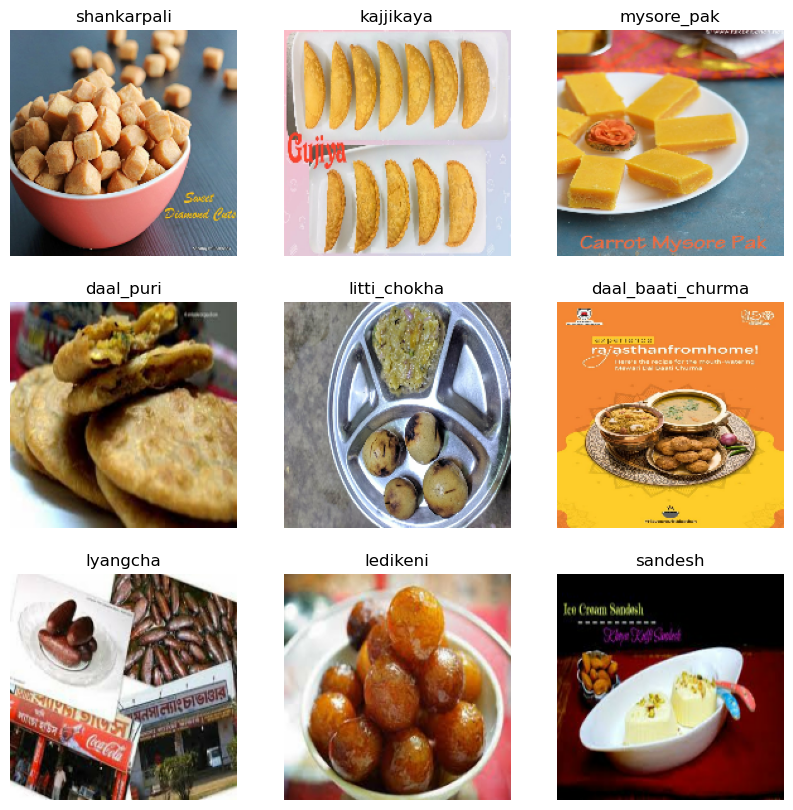

In [8]:
plt.figure(figsize=(10,10))
for image, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

## 3. Model Architecture:
Choose CNN models like VGG, ResNet, MobileNet

Here I am selecting `ResNet50` model for transfer learning.

* ResNet 50 is deep convolutional neural network (CNN) architecture developed by microsoft in 2015. It's varient of popular ResNet architecture which stand for **Residual Network**, The 50 in the names refers to the number of layers in network, which is 50 layers deep.
* ResNet 50 consists of 16 residual blocks, with each block consisting of several convolutional layers with residual connections. The architecture also includes pooling layers, fully connected layers, and softmax output layers for classification.   

**Components of ResNet50**:
1. Convolutional layers.
2. Batch Normalization.
3. Relu Activation.
4. Max Pooling.
5. Flatten layers.
6. Fully Connected Layers.
7. Identity Block.
8. Global Average Pooling.

9. Projection block.

## 4. Transfer Learning:
Fine Tunning for specific image task.

In [9]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(
                            include_top=False,
                            input_shape=(180,180,3),pooling='avg',classes=80,weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
    
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(80,activation='softmax'))

In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 80)                41040     
                                                                 
Total params: 24677840 (94.14 MB)
Trainable params: 1090128 (4.16 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [11]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

## 5. Model Training:

In [12]:
epochs = 10
history = resnet_model.fit(train_ds,validation_data=val_ds,
                          epochs=epochs)

Epoch 1/10
100/100 [==============================] - 157s 2s/step - loss: 3.6585 - accuracy: 0.1566 - val_loss: 3.0075 - val_accuracy: 0.2438
Epoch 2/10
100/100 [==============================] - 152s 2s/step - loss: 2.0592 - accuracy: 0.4575 - val_loss: 2.5700 - val_accuracy: 0.3375
Epoch 3/10
100/100 [==============================] - 214s 2s/step - loss: 1.3733 - accuracy: 0.6306 - val_loss: 2.4586 - val_accuracy: 0.3750
Epoch 4/10
100/100 [==============================] - 202s 2s/step - loss: 0.9453 - accuracy: 0.7563 - val_loss: 2.5760 - val_accuracy: 0.3800
Epoch 5/10
100/100 [==============================] - 201s 2s/step - loss: 0.6050 - accuracy: 0.8559 - val_loss: 2.3608 - val_accuracy: 0.4375
Epoch 6/10
100/100 [==============================] - 202s 2s/step - loss: 0.4048 - accuracy: 0.9144 - val_loss: 2.3116 - val_accuracy: 0.4600
Epoch 7/10
100/100 [==============================] - 205s 2s/step - loss: 0.2586 - accuracy: 0.9538 - val_loss: 2.3662 - val_accuracy: 0.4800

## 6. Model Evaluation:

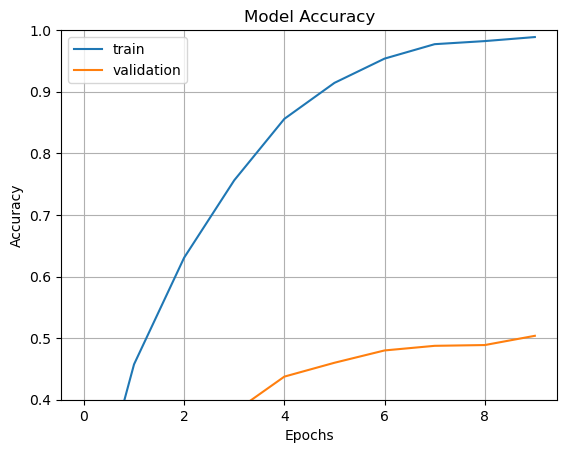

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

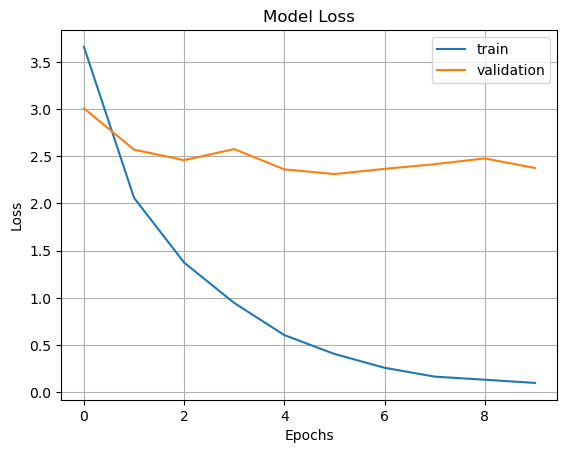

In [14]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## 7. Making Prediction

In [24]:
import cv2
modak = list(directory.glob('modak/*'))
image=plt.imread(str(modak[5]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


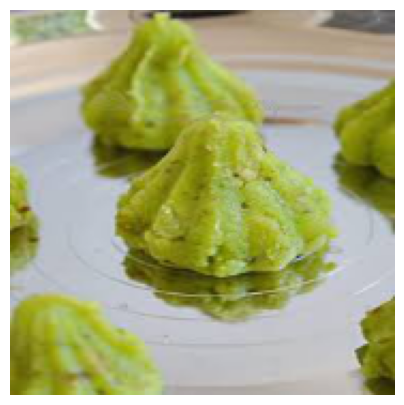

In [37]:
plt.figure(figsize=(5,5))
plt.imshow(image_resized)
plt.axis(False)
plt.show()

In [26]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 1s 906ms/step
[[6.7769301e-06 5.4018192e-06 1.0194908e-09 2.4820428e-08 1.1312524e-07
  5.7275945e-05 2.1570007e-07 1.0294127e-06 2.0048028e-06 2.8440769e-07
  2.5716675e-03 2.7264690e-08 1.0495243e-05 1.1145491e-07 1.6294915e-07
  1.9594162e-09 3.0287533e-04 1.1177008e-09 3.6176696e-06 1.1545946e-07
  1.2420197e-05 4.3312707e-06 5.3674410e-07 2.2809608e-10 7.5677636e-10
  3.2116780e-03 6.5521581e-12 2.7007893e-10 6.8349465e-07 1.2193245e-08
  2.1461269e-06 9.4979072e-08 4.7643907e-09 4.2861156e-08 2.0214907e-06
  1.7763759e-11 1.5139702e-04 4.6857505e-07 4.7453457e-05 2.8384555e-08
  2.0146315e-06 2.8492923e-05 2.4237768e-06 5.3300973e-05 2.6769928e-06
  2.5595091e-07 5.8198220e-05 5.5895975e-07 2.5494952e-08 2.6058117e-06
  2.9622382e-07 2.7748083e-08 6.9850517e-05 9.2731335e-07 6.9230085e-04
  9.2656594e-10 9.9161607e-01 1.1025970e-04 1.8127733e-04 1.9734905e-07
  1.1197418e-07 7.8338235e-07 3.0896889e-08 1.4310645e-05 4.3203113e-07
  7.3263895

In [27]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is modak


**Thank you for reading....**